In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Phasefactor matrix

def P(ni,Di,k0):
    Phasetransfer = np.zeros((2,2),dtype = 'complex');
    Phasetransfer[0,0] = np.exp(1j*k0*Di*ni)
    Phasetransfer[1,1] = np.exp(-1j*k0*Di*ni)
    return Phasetransfer

# Intensity loss matrix

def I(n1,n2):
    Loss = np.zeros((2,2),dtype = 'complex');
    Loss[0,0] = 1 + n2/n1;
    Loss[0,1] = 1 - n2/n1;
    Loss[1,0] = 1 - n2/n1;
    Loss[1,1] = 1 + n2/n1;
    Loss = Loss*0.5;
    return Loss

# Transmission matrix. Only works in medium with n=1

def TR(n,D,k0):
    Transmission = np.eye(2,dtype = 'complex');
    for i in range(np.size(n)-1):
        Transmission = P(n[i+1],D[i+1],k0)@(I(n[i],n[i+1])@Transmission); #All layers except the last one
    Transmission = I(n[i+1],n[0])@Transmission; #The last layer
    return Transmission


# Number of layers and their respective properties are passed and the Transmission matrix used to return the coefficients

def system(n,D,k):
    T = np.zeros(np.size(k));
    R = np.zeros(np.size(k));
    for i in range(np.size(k)):
        Tmatrix = TR(n,D,k[i]); #Find Transmission matrix for current k value
        T[i] = np.abs(Tmatrix[0,0]-(Tmatrix[0,1]*Tmatrix[1,0])/(Tmatrix[1,1]))**2; #Transmission and relfection for current k value
        R[i] = np.abs(Tmatrix[1,0]/(Tmatrix[1,1]))**2;
    return T, R


In [98]:
# Define Thicksness and refractive index
# N layers means N+1 surfaces counting the input and output layer.
D1 = np.ones(10); # All layers have unit thickness
n1 = np.ones(10); # Refractive index is alternating between 1 and 2
n1[1::2] = 2;
D2 = np.ones(20);
n2 = np.ones(20);
n2[1::2] = 2;
D3 = np.ones(30);
n3 = np.ones(30);
n3[1::2] = 2;
n = [n1,n2,n3];
D = [D1,D2,D3];

# Define wavenumber
k0 = np.arange(0,3,0.01); # wavenumber goes from 0 to 3

# Calculate T and R coefficients
T = [None]*len(n);
R = [None]*len(n);
E = [None]*len(n);
for i in range(len(E)):
    T[i], R[i] = system(n[i],D[i],k0);
    E[i] = 1-T[i]-R[i];

In [99]:
# Plot Reflectance and Transmission for all systems
px = 1/plt.rcParams['figure.dpi']
for i in range(len(n)):
    fig, ax = plt.subplots(1,2,figsize=(1920*px, 1080*px))
    ax[0].plot(k0,R[i],'r',label="Reflectance")
    ax[0].plot(k0,T[i],'b',label="Transmission")
    ax[0].set_xlabel("k0")
    ax[0].set_xlim(0,3)
    ax[0].set_ylim(0,1)
    ax[0].set_ylabel("Reflectance/Tranmission")
    ax[0].grid("minor")
    ax[0].legend(loc='upper right')
    ax[1].plot(k0,E[i],'k',label="Energy loss E = 1 - R - T")
    ax[1].set_xlabel("k0")
    ax[1].set_xlim(0,3)
    ax[1].set_ylim(-4e-15,4e-15)
    ax[1].set_ylabel("Energy loss E")
    ax[1].grid("minor")
    ax[1].legend(loc="upper right")
    plt.savefig(str(i+1)+ "system.png")
    plt.close()


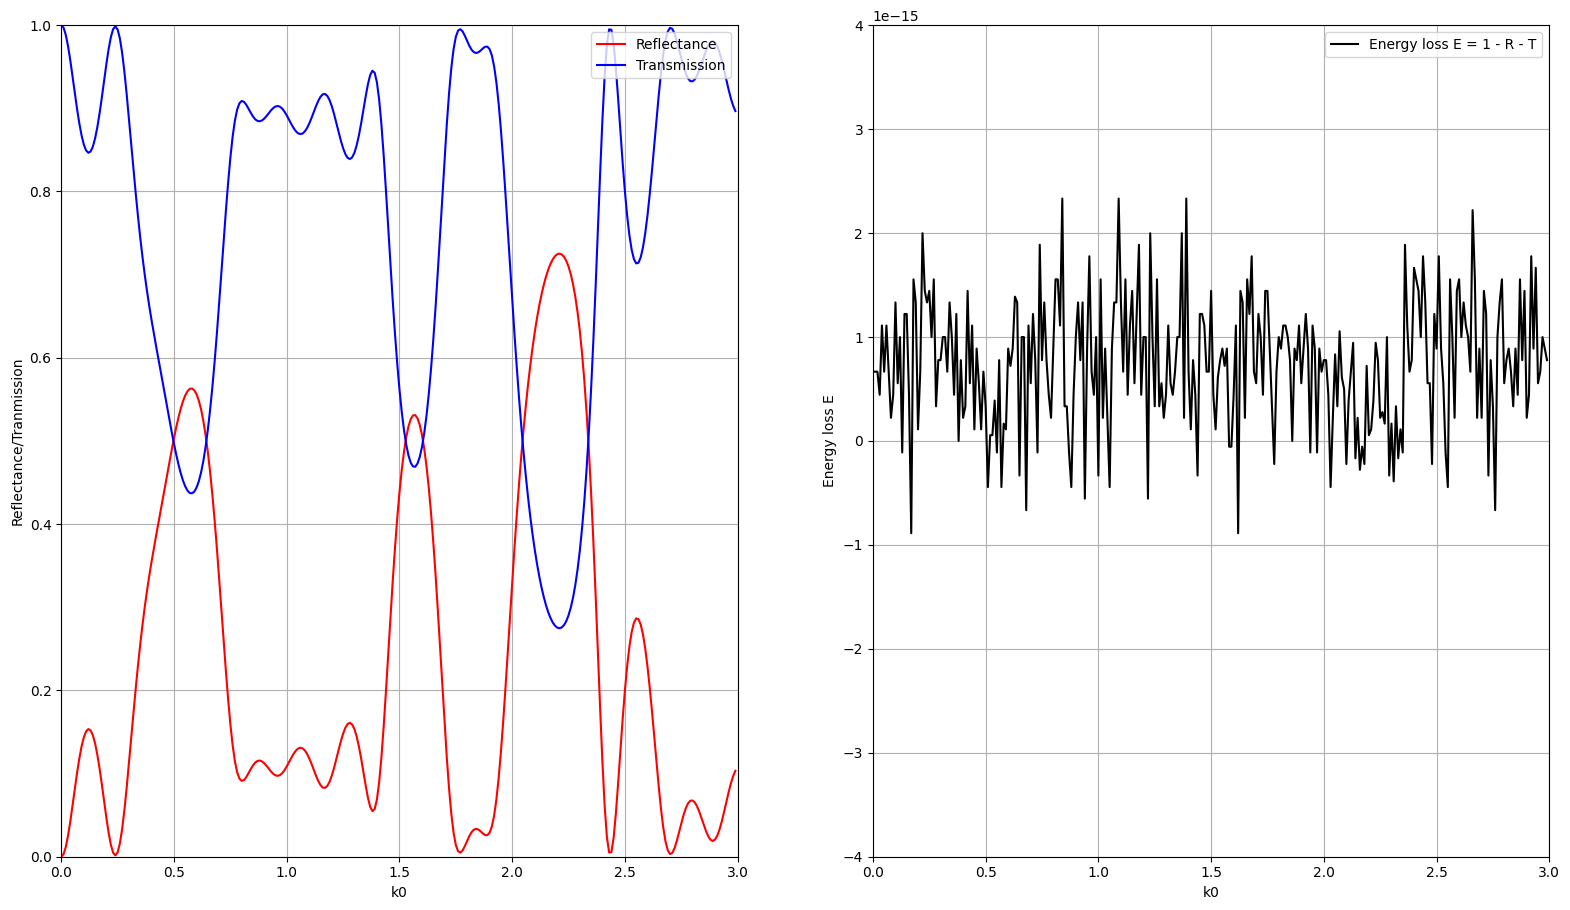

In [100]:
#Anti reflection coating?
n4 = np.ones(10);
n4[1::2] = np.sqrt(2);
n4[2::4] = 2;
n4[0::4] = 1;

T4, R4 = system(n4,D1,k0)
E4 = 1 - R4 - T4;

fig, ax = plt.subplots(1,2,figsize=(1920*px, 1080*px))
ax[0].plot(k0,R4,'r',label="Reflectance")
ax[0].plot(k0,T4,'b',label="Transmission")
ax[0].set_xlabel("k0")
ax[0].set_xlim(0,3)
ax[0].set_ylim(0,1)
ax[0].set_ylabel("Reflectance/Tranmission")
ax[0].grid("minor")
ax[0].legend(loc='upper right')
ax[1].plot(k0,E4,'k',label="Energy loss E = 1 - R - T")
ax[1].set_xlabel("k0")
ax[1].set_xlim(0,3)
ax[1].set_ylim(-4e-15,4e-15)
ax[1].set_ylabel("Energy loss E")
ax[1].grid("minor")
ax[1].legend(loc="upper right")